In [1]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.geochemistry.PEC as pec
import pandas as pd
import elements as e
import matplotlib.pyplot as plt
import meltInc.plotting as p

p.layout()
config = mp.configuration()
config.melt_thermometer = "putirka2008_16"
config.print()

Kd Fe-Mg ol-melt.......................toplis
Melt Fe3+/Fe2+........................borisov
Melt thermometer...............putirka2008_16
Volatile solubility model......IaconoMarziano


In [2]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')
olivine = mp.read_olivine('./olivine.csv', index_col=['name'], total_col="total")

In [3]:
idx = 6
forsterites = olivine.forsterite
inclusion = melt.iloc[idx, :].copy()
ol_host = olivine.iloc[idx, :].copy()
Fo = 0.9
FeO_initial = 11.2
P_bar = 2e3
Fo

0.9

In [4]:
w, t, kd, oc = pec.Fe_equilibrate(inclusion, Fo, P_bar)

In [5]:
oc

-0.03125000000000002

In [6]:
inclusion_2 = w.iloc[-1]

In [7]:
inclusion_2

SiO2      45.375010
Al2O3     18.470993
MgO        7.760545
CaO       10.217336
FeO        7.227220
Na2O       4.125795
K2O        1.451056
MnO        0.186033
TiO2       3.297949
P2O5       1.031449
Cr2O3      0.000000
CO2        0.214765
H2O        0.376133
F          0.092810
S          0.103972
Cl         0.068935
total    100.000000
Name: -0.014000000000000005, dtype: float64

In [8]:
w2, om, kd2, t = pec.crystallisation_correction(inclusion_2, Fo, FeO_initial, P_bar)

In [9]:
t, om

((1515.8468826814756, 1456.2854389087715), 0.23000000000000007)

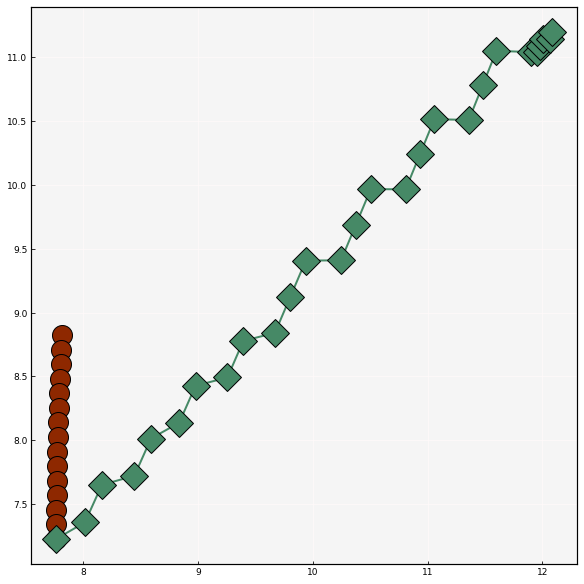

In [10]:

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(w["MgO"], w["FeO"], "-o")
ax.plot(w2["MgO"], w2["FeO"], "-D")

In [12]:
w2

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,CO2,H2O,F,S,Cl,total
0.000,45.375010,18.470993,7.760545,10.217336,7.227220,4.125795,1.451056,0.186033,3.297949,1.031449,0.0,0.214765,0.376133,0.092810,0.103972,0.068935,100.0
0.010,45.317768,18.319874,8.012355,10.133744,7.356940,4.092040,1.439185,0.184511,3.270967,1.023010,0.0,0.213007,0.373056,0.092050,0.103121,0.068372,100.0
0.020,45.226958,18.156109,8.160518,10.043156,7.651013,4.055461,1.426319,0.182861,3.241727,1.013865,0.0,0.211103,0.369721,0.091228,0.102199,0.067760,100.0
0.030,45.182090,18.011677,8.443832,9.963263,7.722507,4.023200,1.414973,0.181407,3.215939,1.005800,0.0,0.209424,0.366780,0.090502,0.101386,0.067221,100.0
0.040,45.092231,17.850198,8.588559,9.873940,8.014159,3.987131,1.402287,0.179780,3.187107,0.996783,0.0,0.207547,0.363492,0.089690,0.100477,0.066619,100.0
0.050,45.036997,17.703343,8.834962,9.792706,8.138129,3.954328,1.390751,0.178301,3.160887,0.988582,0.0,0.205839,0.360501,0.088953,0.099651,0.066071,100.0
0.060,44.948208,17.544214,8.976551,9.704683,8.426808,3.918784,1.378250,0.176699,3.132475,0.979696,0.0,0.203989,0.357261,0.088153,0.098755,0.065477,100.0
0.070,44.905323,17.403883,9.254893,9.627058,8.492488,3.887439,1.367226,0.175285,3.107419,0.971860,0.0,0.202357,0.354403,0.087448,0.097965,0.064953,100.0
0.080,44.817471,17.247004,9.393096,9.540280,8.778786,3.852397,1.354901,0.173705,3.079409,0.963099,0.0,0.200533,0.351208,0.086660,0.097082,0.064367,100.0
0.090,44.775514,17.108666,9.668876,9.463757,8.841827,3.821497,1.344034,0.172312,3.054709,0.955374,0.0,0.198925,0.348391,0.085965,0.096303,0.063851,100.0
